<a href="https://colab.research.google.com/github/KaraffaLB/Latlab/blob/main/CUDA_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CUDA

This demo illustrates the use of the CUDA programming language.

## Install essentials

Since running CUDA in Colab is tricky, we need a few installs first

In [ ]:
!apt-get update -y
!apt-get install -y cuda-12-4

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [69.9 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,769 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://developer.download.nvidia.com/compute/cuda/repos/ubun

In [4]:
!sudo rm -rf /usr/local/cuda
!sudo ln -s /usr/local/cuda-12.4 /usr/local/cuda

In [5]:
!export PATH=/usr/local/cuda-12.4/bin:$PATH
!export LD_LIBRARY_PATH=/usr/local/cuda-12.4/lib64:$LD_LIBRARY_PATH

In [6]:
!echo $PATH
!echo $LD_LIBRARY_PATH

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin
/usr/lib64-nvidia


In [7]:
!pip install opencv-python
!nvcc --version
!pip install git+https://github.com/andreinechaev/nvcc4jupyter.git
%load_ext nvcc4jupyter

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Mar_28_02:18:24_PDT_2024
Cuda compilation tools, release 12.4, V12.4.131
Build cuda_12.4.r12.4/compiler.34097967_0
  Cloning https://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-e7dl22x6
  Running command git clone --filter=blob:none --quiet https://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-e7dl22x6
  Resolved https://github.com/andreinechaev/nvcc4jupyter.git to commit 28f872a2f99a1b201bcd0db14fdbc5a496b9bfd7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for nvcc4jupyter: filename=nvcc4jupyter-1.2.1-py3-none-any.whl size=10742 sha256=fdb30b442a03a2b978d94f242f4f3839c3b517111d4c5bcc31496f40b5aacbba
  Stored in directory: /tmp/pip-ephem-wheel-cache-krqlwm7_/wheels/ef/1d/c6/f7e47f1aa1bc9d05c4120d94f90a79cf28603ef343b0dd43ff
Successfully built nvcc4jupyter


## Simple Example

In [ ]:
%%cuda
#include <stdio.h>
#include <stdlib.h>
#include <iostream>

// TODO: Kernel function add
// Kernel should get three arrays, a,b,c and their size N
// Implement c=a+b

    // TODO: Compute Index

    // TODO: Add element

// Main program
int main() {

    // Basics
    int N = 10;
    int size = N*sizeof(float);

    // Setup input values
    float *a, *b, *c;

    // TODO: Allocate memory for arrays

    // TODO: Initialize inputs

    // Device copies of variables a, b & c
    float *d_a, *d_b, *d_c;

    // TODO: Allocate space for device copies of a, b, c

    // TODO: Copy inputs to device

    // TODO: Launch add() kernel on GPU

    // TODO: Copy result back to host

    // Print results
    for(int j = 0; j < N; j++)
    {
        std::cout << a[j] << " + " << b[j] << " = " << c[j] << std::endl;
    }

    // Cleanup
    cudaFree(d_a);
    cudaFree(d_b);
    cudaFree(d_c);
    free(a);
    free(b);
    free(c);

    return 0;
}

## Dot Product

In [ ]:
%%cuda
#include <iostream>
#include <stdlib.h>
#define N (1024)
#define THREADS_PER_BLOCK 128

// Dot product kernel
__global__ void dot(float *a, float *b, float *c)
{
    // TODO: Create shared memory

    // TODO: Compute index

    // TODO: Make sure we remain within array bounds

        // TODO: Compute dot per element

        // TODO: Synch within block

        // TODO: First thread does the sum

            // TODO: First, sum the shared memory

            // TODO: Then sum partial results into global memory

}

int main()
{
    // Basic vars
    float *a, *b, *c;
    float *dev_a, *dev_b, *dev_c;
    int size = N * sizeof(float);

    // Allocate space for the variables on the device
    cudaMalloc((void **)&dev_a, size);
    cudaMalloc((void **)&dev_b, size);
    cudaMalloc((void **)&dev_c, sizeof(float));

    // Allocate space for the variables on the host
    a = (float *)malloc(size);
    b = (float *)malloc(size);
    c = (float *)malloc(sizeof(float));

    // This is our ground truth
    float sumTest = 0;

    // Generate random numbers
    for (int i = 0; i < N; i++)
    {
        a[i] = static_cast <float> (rand()) / static_cast <float> (RAND_MAX)-0.5;
        b[i] = static_cast <float> (rand()) / static_cast <float> (RAND_MAX)-0.5;
        sumTest += a[i] * b[i];
    }
    *c = 0;

    // Copy inputs to GPU
    cudaMemcpy(dev_a, a, size, cudaMemcpyHostToDevice);
    cudaMemcpy(dev_b, b, size, cudaMemcpyHostToDevice);
    cudaMemcpy(dev_c, c, size, cudaMemcpyHostToDevice);

    // TODO: Call kernel

    // Copy result from GPU
    cudaMemcpy(c, dev_c, sizeof(int), cudaMemcpyDeviceToHost);

    std::cout << "CPU: " << sumTest << " GPU: " << *c << std::endl;

    // Cleanup
    free(a);
    free(b);
    free(c);

    cudaFree(a);
    cudaFree(b);
    cudaFree(c);

    return 0;

 }

## Prepare image

To be able to process it from native C++ we download an image and convert it to csv format. This is done becuase it is difficult to compile OpenCV and CUDA at the same time in Colab

rm: cannot remove 'Lena.png': No such file or directory
--2025-03-20 14:15:27--  http://deeplearning.iit.bme.hu/Public/Lena.png
Resolving deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)... 152.66.243.112
Connecting to deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)|152.66.243.112|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://deeplearning.iit.bme.hu/Public/Lena.png [following]
--2025-03-20 14:15:28--  https://deeplearning.iit.bme.hu/Public/Lena.png
Connecting to deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)|152.66.243.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lena.png’

Lena.png            100%[===================>] 462.73K   535KB/s    in 0.9s    

2025-03-20 14:15:29 (535 KB/s) - ‘Lena.png’ saved [473831/473831]



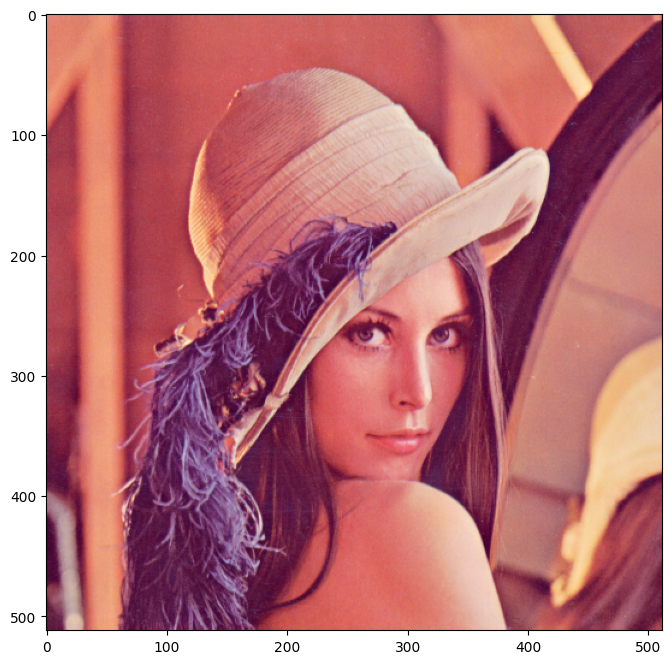

In [14]:
!rm Lena.png
!wget http://deeplearning.iit.bme.hu/Public/Lena.png --no-check-certificate
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('Lena.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB).reshape((img.shape[0],img.shape[1]*3))
np.savetxt('lena.csv',img,delimiter=',',fmt='%d')
plt.figure(figsize=(8,8))
plt.imshow(img.reshape((img.shape[0],img.shape[1]//3,3)))

## GrayScale Conversion

In [23]:
%%cuda
#include <iostream>
#include <fstream>
#include <sstream>

// Kernel
__global__ void grayscale( cudaTextureObject_t image, unsigned char* result, int width )
{
    // TODO: Now, we have 2D arrays, so 2 indices

    // TODO: Get pixel from texture

    // TODO: Compute grayscale value

    // TODO: Write output
}

// Read csv
void readCsv(std::string fname, unsigned char* imData)
{
    // File pointer
    std::fstream fin;

    // Open an existing file
    fin.open(fname, std::ios::in);

    // Vars
    std::string line, word;

    // Counter
    int i = 0;

    // While there are lines
    while (std::getline(fin, line)) {

        // used for breaking words
        std::stringstream s(line);

        // read every column data of a row and
        // store it in a string variable, word
        while (getline(s, word, ',')) {

            // String to integer
            imData[i++] = std::stoi(word);

            // Add a 0 value to every 4th position (needed because we have uchar4 texture)
            if (i%4 == 3)
                imData[i++] = 0;
        }
    }
}

// Write csv
void writeCsv(std::string fname, unsigned char* imData, int width, int height)
{
    // File pointer
    std::fstream fout;

    // Open a new file
    fout.open(fname, std::ios::out);

    for( int i = 0; i < height; i++)
    {
        int offs = width * i;

        for (int j = 0; j < width; j++)
        {
            // Write value (float conversion needed to aviod writing chars as ascii)
            fout << float(imData[offs+j]);

            // Avoid writing comma after last value in row (causes errors later)
            if (j < width-1)
                fout << ",";
        }

        fout << std::endl;
    }
}

int main()
{
    // Basic variables
    unsigned char *imData;
    int width = 512;
    int height = 512;
    int ch = 4;

    // TODO: Read image
    int size = width * height * sizeof( unsigned char );

    // Create channel descriptor
    cudaChannelFormatDesc channelDesc = cudaCreateChannelDesc<uchar4>();

    // Allocate GPU array and copy image
    cudaArray* cu_array;
    cudaMallocArray( &cu_array, &channelDesc , width, height );
    cudaMemcpyToArray( cu_array, 0, 0, imData, size*ch, cudaMemcpyHostToDevice);

    // Create resource descriptor (basically, stupid administration)
    struct cudaResourceDesc resDesc;
    memset(&resDesc, 0, sizeof(resDesc));
    resDesc.resType = cudaResourceTypeArray;
    resDesc.res.array.array = cu_array; //Here, we bind the cu_array, where the actual data is

    // Tecture descriptor (basically the settings of the texture memory)
    struct cudaTextureDesc texDesc;
    memset(&texDesc, 0, sizeof(texDesc));
    // TODO: Set texture parameters

    // TODO: Create the texture memory object

    // Allocate output
    unsigned char *result, *result_cpu;
    cudaMalloc((void **)&result, size);
    result_cpu = (unsigned char *)malloc(size);

    // TODO: Call kernel

    // Copy result from GPU and save
    cudaMemcpy(result_cpu, result, size, cudaMemcpyDeviceToHost);
    writeCsv("lena_gray.csv",result_cpu,width,height);

    // Cleanup
    cudaFreeArray( cu_array );
    cudaFree( result );
}

### Display

In [15]:
# Show image
img = np.loadtxt("lena_gray.csv",delimiter=",").astype('uint8')
plt.figure(figsize=(8,8))
plt.imshow(img,cmap='gray')

FileNotFoundError: lena_gray.csv not found.

### Create Noisy image

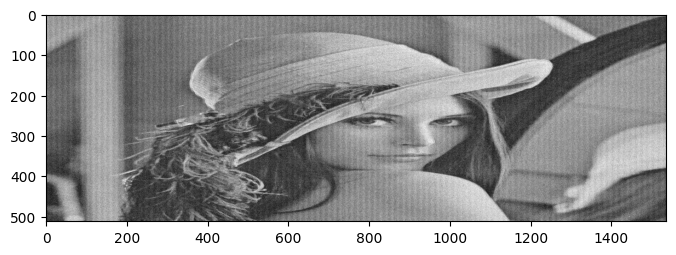

In [16]:
# Add noise to the image
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col= image.shape
        mean = 0
        sigma = 15
        # Create random gaussian
        gauss = np.random.normal(mean,sigma,(row,col))
        # Make sure it has the same shape
        gauss = gauss.reshape(row,col)
        noisy = image + gauss
        noisy = np.clip(noisy,0,255)
        return noisy
    elif noise_typ == "snp":
        row,col = image.shape
        s_vs_p = 0.5
        amount = 0.02
        out = np.copy(image)
        # Number of salt (half of total)
        num_salt = np.ceil(amount * image.size * s_vs_p)
        # Random locations
        coords = tuple([np.random.randint(0, i - 1, int(num_salt)) for i in image.shape])
        out[coords] = 255

        # Number of pepper (half of total)
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        # Random locations
        coords = tuple([np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape])
        out[coords] = 0
        return out

img_noise = noisy("gauss",img)
np.savetxt('lena_noisy.csv',img_noise,delimiter=',',fmt='%d')
plt.figure(figsize=(8,8))
plt.imshow(img_noise,cmap='gray')

## Convolution

In [26]:
%%cuda
#include <iostream>
#include <fstream>
#include <sstream>


// TODO: Helper function to get a single weighted pixel
 __device__ float getWPixel(cudaTextureObject_t image, int ix, int iy, int dx, int dy, float* cmtx)
 {

// Inputs: image, a cuda texture
//         ix, iy the position in the image
//         dx, dy the positions in the kernel
//         cmtx the pointer to the kernel matrix

    // TODO: Get pixel value
    unsigned int img_x=ix+dx-1;
    unsigned int img_y=iy+dy-1;
    unsigned char px=(unsigned char) tex2D<char>( image, (float)img_x, (float)img_y );

    // TODO: Get kernel value
    float coeff = cmtx[dy*3+dx];

    // TODO: Return product
  return (px * coeff);
 }

// Conv kernel
 __global__ void convolve ( cudaTextureObject_t image, unsigned char* result, int width, float* cmtx)
{
    // TODO: 2D indexing
    unsigned int x = blockDim.x*blockIdx.x + threadIdx.x;
    unsigned int y = blockDim.y*blockIdx.y + threadIdx.y;
    unsigned int thrId = y*width + x;
    float acc = 0;

    // TODO: Add 9 weighted pixels
      for(unsigned int i = 0; i < 3; i++){
        for(int j = 0; j < 3; j++){
            acc = acc + getWPixel( image, x, y, i, j, cmtx);
        }
    }
    // TODO: Write result
    result[thrId] = acc;
}


// Read csv
void readCsv(std::string fname, unsigned char* imData)
{
    // File pointer
    std::fstream fin;

    // Open an existing file
    fin.open(fname, std::ios::in);

    // Vars
    std::string line, word;

    // Counter
    int i = 0;

    // While there are lines
    while (std::getline(fin, line)) {

        // used for breaking words
        std::stringstream s(line);

        // read every column data of a row and
        // store it in a string variable, word
        while (getline(s, word, ',')) {

            // String to integer
            imData[i++] = std::stoi(word);
        }
    }
}

// Write csv
void writeCsv(std::string fname, unsigned char* imData, int width, int height)
{
    // File pointer
    std::fstream fout;

    // Open a new file
    fout.open(fname, std::ios::out);

    for( int i = 0; i < height; i++)
    {
        int offs = width * i;

        for (int j = 0; j < width; j++)
        {
            // Write value (float conversion needed to aviod writing chars as ascii)
            fout << float(imData[offs+j]);

            // Avoid writing comma after last value in row (causes errors later)
            if (j < width-1)
                fout << ",";
        }

        fout << std::endl;
    }
}


int main()
{
    // Basic variables
    unsigned char *imData;
    int width = 512;
    int height = 512;
    int ch = 1;

    // Read image
    int size = width * height * sizeof( unsigned char );
    imData = (unsigned char *)malloc(size * ch);
    readCsv("lena_noisy.csv",imData);

    // Create channel descriptor
    cudaChannelFormatDesc channelDesc = cudaCreateChannelDesc<uchar1>();

    // Allocate GPU array and copy image
    cudaArray* cu_array;
    cudaMallocArray( &cu_array, &channelDesc , width, height );
    cudaMemcpyToArray( cu_array, 0, 0, imData, size*ch, cudaMemcpyHostToDevice);

    // Create resource descriptor (basically, stupid administration)
    struct cudaResourceDesc resDesc;
    memset(&resDesc, 0, sizeof(resDesc));
    resDesc.resType = cudaResourceTypeArray;
    resDesc.res.array.array = cu_array; //Here, we bind the cu_array, where the actual data is

    // Tecture descriptor (basically the settings of the texture memory)
    struct cudaTextureDesc texDesc;
    memset(&texDesc, 0, sizeof(texDesc));
    texDesc.addressMode[0]   = cudaAddressModeWrap;
    texDesc.addressMode[1]   = cudaAddressModeWrap;
    texDesc.filterMode       = cudaFilterModePoint;
    texDesc.readMode         = cudaReadModeElementType;
    texDesc.normalizedCoords = false;

    // Create the texture memory object
    cudaTextureObject_t image = 0;
    cudaCreateTextureObject(&image, &resDesc, &texDesc, NULL);

    // TODO: Create filter
    float filt [9] = {1, 2, 3, 4, 5, 6, 7, 8, 9};

    // Copy filter to GPU
    float *cmtx;
    cudaMalloc((void **)&cmtx, 9*sizeof(float));
    cudaMemcpy(cmtx, filt, 9*sizeof(float), cudaMemcpyHostToDevice);

    // Allocate output
    unsigned char *result, *result_cpu;
    cudaMalloc((void **)&result, size);
    result_cpu = (unsigned char *)malloc(size);

    // Call kernel
    dim3 dimBlock( 8, 8, 1 );
    dim3 dimGrid( width >> 3, height >> 3, 1 );
    convolve<<< dimGrid , dimBlock >>>(image, result, width, cmtx);

    // Copy result from GPU and save
    cudaMemcpy(result_cpu, result, size, cudaMemcpyDeviceToHost);
    writeCsv("lena_filt.csv",result_cpu,width,height);

    // Cleanup
    cudaFreeArray( cu_array );
    cudaFree( result );
}


## Display

In [25]:
img_filt = np.loadtxt("lena_filt.csv",delimiter=",").astype('uint8')
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img_noise,cmap='gray',norm=plt.Normalize(0,255))
plt.subplot(1,2,2)
plt.imshow(img_filt,cmap='gray',norm=plt.Normalize(0,255))

FileNotFoundError: lena_filt.csv not found.